In [8]:
import os
import numpy as np
import cv2
from tqdm import tqdm

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
config_file=r'D:\deepLearning\mmsegmentation-main\lraspp_ket_fastvit_ful\lraspp_ket_fastvit_ful.py'
checkpoint_file=r'D:\deepLearning\mmsegmentation-main\lraspp_ket_fastvit_ful\best_mIoU_iter_16000.pth'
model = init_model(config_file, checkpoint_file, device='cuda:0')

05/23 12:09:46 - mmengine - INFO - backbone out_indices: (0, 1, 3)
05/23 12:09:46 - mmengine - INFO - backbone out_channels: [48, 96, 384]
05/23 12:09:46 - mmengine - INFO - backbone out_strides: [4, 8, 32]
Loads checkpoint by local backend from path: D:\deepLearning\mmsegmentation-main\lraspp_ket_fastvit_ful\best_mIoU_iter_16000.pth


d:\deeplearning\mmsegmentation-main\mmseg\models\losses\cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [10]:
from sklearn.metrics import confusion_matrix

In [7]:
matrix = [[0 for _ in range(4)] for _ in range(4)]
matrix_np = np.array(matrix)

In [10]:
def process_single_img(img_path,label_path):
    
    img_bgr = cv2.imread(img_path)
    label = cv2.imread(label_path)
    label_mask = label[:,:,0]
    # 语义分割预测
#     result = inference_model(model, img_bgr)
    result = inference_model(model, img_bgr)
    
    
    pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
    
    print(np.unique(label_mask))
    print(np.unique(pred_mask))
    
    confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())
    
    
    
    if 0 not in np.unique(label_mask):
        confusion_matrix_model = np.pad(confusion_matrix_model, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    
    elif 3 not in np.unique(label_mask) and 3 not in np.unique(pred_mask):
        confusion_matrix_model = np.pad(confusion_matrix_model, ((0, 1), (0, 1)), mode='constant')
    return confusion_matrix_model

In [11]:
import os

# 定义两个文件夹的路径
folder_path_png = r'D:\deepLearning\mmsegmentation-main\MoS2_data\ann_dir\test'
folder_path_jpg = r'D:\deepLearning\mmsegmentation-main\MoS2_data\img_dir\test'

# 获取文件夹中的所有文件名
png_files = os.listdir(folder_path_png)
jpg_files = os.listdir(folder_path_jpg)

# 创建一个空列表来存储相同文件名的图片


# 遍历png文件夹中的文件
for png_file in png_files:
    # 获取文件名（不包含扩展名）
    file_name = os.path.splitext(png_file)[0]
    jpg_file = f"{file_name}.jpg"
    # 检查在jpg文件夹中是否存在同名的文件
    if jpg_file in jpg_files:
        print(png_file,jpg_file)
        
        png = os.path.join(folder_path_png,png_file)
        jpg = os.path.join(folder_path_jpg,jpg_file)
        
        
        result = process_single_img(jpg,png) 
        print(result.shape)
        matrix_np += result

100.png 100.jpg
[0 1 2 3]
[0 1 2 3]
(4, 4)
20_1.png 20_1.jpg
[0 1 2]
[0 1 2]
(4, 4)
39_2.png 39_2.jpg
[0 1 2]
[0 1 2 3]
(4, 4)
3_6.png 3_6.jpg
[0 1 3]
[0 1 3]
(3, 3)


ValueError: operands could not be broadcast together with shapes (4,4) (3,3) (4,4) 

[[ 41876   3806      0   1489]
 [  9866 424357  11058   4133]
 [   208   3644  18088   3977]
 [   105    213   3865   4451]]
[[503542   4371      0   1489]
 [ 13508 486469  11238   4133]
 [   208   4698  20005   3977]
 [   105    213   3865   4451]]
[[833620  10947      0   1489]
 [ 16179 661210  14033   4137]
 [   328   5740  33114   3977]
 [   105    213   3865   4451]]
[[ 914716   18556       0    1489]
 [  18123 1086786   14033    7033]
 [    328    5740   33114    3977]
 [    105    1738    3865   14941]]
[[1376623   21604       0    1489]
 [  26707 1131332   14773    7033]
 [   1448    6463   43582    3977]
 [    105    1738    3865   14941]]
[[1864735   23457       0    1489]
 [  27801 1159958   14773    7033]
 [   1620    8644   52680    3977]
 [    105    1738    3865   14941]]
[[2136417   27582       0    1489]
 [  44977 1287648   22490    7033]
 [   1947   22970  140773    3977]
 [    105    1738    3865   14941]]
[[2566033   30871       0    1489]
 [  48711 1360567   26284 

<Figure size 1000x800 with 0 Axes>

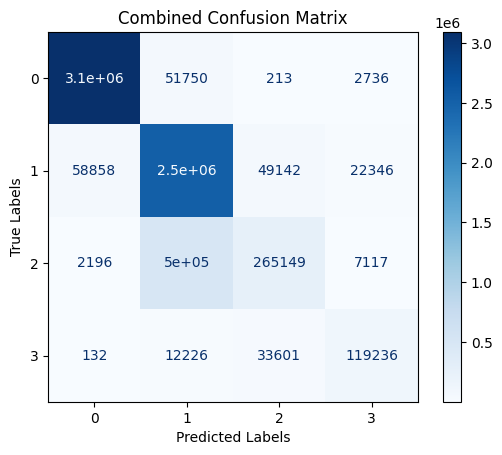

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def process_single_img(img_path, label_path):
    img_bgr = cv2.imread(img_path)
    label = cv2.imread(label_path)
    label_mask = label[:, :, 0]
    
    # Perform semantic segmentation prediction
    result = inference_model(model, img_bgr)
    pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
    
    # Flatten the masks to 1D arrays
    label_mask_flat = label_mask.flatten()
    pred_mask_flat = pred_mask.flatten()
    
    # Compute the confusion matrix
    cm = confusion_matrix(label_mask_flat, pred_mask_flat)
    return cm, np.unique(label_mask_flat), np.unique(pred_mask_flat)

# Define folder paths
folder_path_png = r'D:\deepLearning\mmsegmentation-main\MoS2_data\ann_dir\test'
folder_path_jpg = r'D:\deepLearning\mmsegmentation-main\MoS2_data\img_dir\test'

# Get file names
png_files = os.listdir(folder_path_png)
jpg_files = os.listdir(folder_path_jpg)

# Initialize variables to track the combined confusion matrix and the unique classes
all_labels = set()

# First pass to collect all unique labels
for png_file in png_files:
    file_name = os.path.splitext(png_file)[0]
    jpg_file = f"{file_name}.jpg"
    
    if jpg_file in jpg_files:
        png = os.path.join(folder_path_png, png_file)
        jpg = os.path.join(folder_path_jpg, jpg_file)
        
        _, true_labels, pred_labels = process_single_img(jpg, png)
        all_labels.update(true_labels)
        all_labels.update(pred_labels)

# Convert labels to a sorted list to maintain consistent ordering
all_labels = sorted(list(all_labels))
label_to_index = {label: idx for idx, label in enumerate(all_labels)}
num_labels = len(all_labels)

# Initialize the combined confusion matrix
combined_cm = np.zeros((num_labels, num_labels), dtype=int)

# Second pass to accumulate the confusion matrix
for png_file in png_files:
    file_name = os.path.splitext(png_file)[0]
    jpg_file = f"{file_name}.jpg"
    
    if jpg_file in jpg_files:
        png = os.path.join(folder_path_png, png_file)
        jpg = os.path.join(folder_path_jpg, jpg_file)
        
        cm, true_labels, pred_labels = process_single_img(jpg, png)
        
        # Map the true and predicted labels to the indices of the combined confusion matrix
        for i, true_label in enumerate(true_labels):
            for j, pred_label in enumerate(pred_labels):
                combined_cm[label_to_index[true_label], label_to_index[pred_label]] += cm[i, j]
        print(combined_cm)
# Plot the combined confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=combined_cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Combined Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def process_single_img(img_path, label_path):
    img_bgr = cv2.imread(img_path)
    label = cv2.imread(label_path)
    label_mask = label[:, :, 0]
    
    # Perform semantic segmentation prediction (replace with your actual model and prediction code)
    result = inference_model(model, img_bgr)
    pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
    
    # Flatten the masks to 1D arrays
    label_mask_flat = label_mask.flatten()
    pred_mask_flat = pred_mask.flatten()
    
    # Compute the confusion matrix
    cm = confusion_matrix(label_mask_flat, pred_mask_flat)
    if sum(np.unique(label_mask_flat)) > sum(np.unique(pred_mask_flat)):
        uni = np.unique(label_mask_flat)
    else:
        uni=np.unique(pred_mask_flat)
    return cm, uni

# Define folder paths
folder_path_png = r'D:\deepLearning\mmsegmentation-main\MoS2_data\ann_dir\test'
folder_path_jpg = r'D:\deepLearning\mmsegmentation-main\MoS2_data\img_dir\test'

# Get file names
png_files = os.listdir(folder_path_png)
jpg_files = os.listdir(folder_path_jpg)




# Convert labels to a sorted list to maintain consistent ordering


# Initialize the combined confusion matrix
combined_cm = np.zeros((4,4), dtype=int)

# Second pass to accumulate the confusion matrix
for png_file in png_files:
    file_name = os.path.splitext(png_file)[0]
    jpg_file = f"{file_name}.jpg"
    if jpg_file in jpg_files:
        png = os.path.join(folder_path_png, png_file)
        jpg = os.path.join(folder_path_jpg, jpg_file)
        cm, uni = process_single_img(jpg, png)
        
        # Map the true and predicted labels to the indices of the combined confusion matrix
        for i, true_label in enumerate(uni):
            for j, pred_label in enumerate(uni):
                combined_cm[label_to_index[true_label], label_to_index[pred_label]] += cm[i, j]
print(combined_cm)
# Plot the combined confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=combined_cm, display_labels=all_labels)
# disp.plot(cmap=plt.cm.Blues)
plt.title('Combined Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


NameError: name 'label_to_index' is not defined